### Data Loading

In [0]:

df=spark.read.format('csv').option('inferschema',True).option('header',True).load('/FileStore/tables/BigMart_Sales-1.csv')

In [0]:
display(df.limit(10))

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
FDP10,null,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535


In [0]:
df.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Item_Visibility: double (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Size: string (nullable = true)
 |-- Outlet_Location_Type: string (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)



In [0]:

from pyspark.sql.functions import *
from pyspark.sql.types import *

In [0]:
data_schema=StructType([
  StructField('Item_Identifier',StringType(),True),
  StructField('Item_Weight',DoubleType(),True),
  StructField('Item_Fat_Content',StringType(),True),
  StructField('Item_Visibility',DoubleType(),True),
  StructField('Item_Type',StringType(),True),
  StructField('Item_MRP',DoubleType(),True),
  StructField('Outlet_Identifier',StringType(),True),
  StructField('Outlet_Establishment_Year',IntegerType(),True),
  StructField('Outlet_Size',StringType(),True),
  StructField('Outlet_Location_Type',StringType(),True),
  StructField('Outlet_Type',StringType(),True),
  StructField('Item_Outlet_Sales',DoubleType(),True)
])

In [0]:
df=spark.read.format('csv').option('inferschema',True).option('header',True).schema(data_schema).load('/FileStore/tables/BigMart_Sales-1.csv')

In [0]:
df.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: double (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Item_Visibility: double (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: double (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: integer (nullable = true)
 |-- Outlet_Size: string (nullable = true)
 |-- Outlet_Location_Type: string (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: double (nullable = true)



In [0]:
df.select(col('Item_Identifier'),col('Item_weight')).limit(10).display()

Item_Identifier,Item_weight
FDA15,9.3
DRC01,5.92
FDN15,17.5
FDX07,19.2
NCD19,8.93
FDP36,10.395
FDO10,13.65
FDP10,null
FDH17,16.2
FDU28,19.2


In [0]:
 df.select(col('Item_Identifier').alias('item-Number'),col('Item_weight')).limit(20).display()

item-Number,Item_weight
FDA15,9.3
DRC01,5.92
FDN15,17.5
FDX07,19.2
NCD19,8.93
FDP36,10.395
FDO10,13.65
FDP10,null
FDH17,16.2
FDU28,19.2


In [0]:
display(df.limit(20))

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
FDP10,null,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535


In [0]:
df.filter(col('Item_Fat_Content')=='Regular').limit(20).display()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535
FDA03,18.5,Regular,0.045463773,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.153
FDX32,15.1,Regular,0.1000135,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646
FDS46,17.6,Regular,0.047257328,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076
FDP49,9.0,Regular,0.069088961,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192


In [0]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline

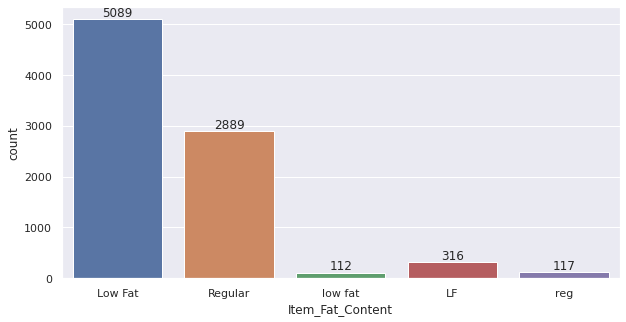

In [0]:
da=df.select(col('Item_Fat_Content'))
data=da.toPandas()
sns.set(rc={'figure.figsize':(10,5)})
s=sns.countplot(x='Item_Fat_Content',data=data,)
for bars in s.containers:
   s.bar_label(bars)


In [0]:
df.filter( (col('Item_Type')=='Soft Drinks') & (col('Item_Weight')<10) ).limit(20).display()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
DRZ11,8.85,Regular,0.113123893,Soft Drinks,122.5388,OUT018,2009,Medium,Tier 3,Supermarket Type2,1609.9044
DRF49,7.27,Low Fat,0.071077939,Soft Drinks,114.2518,OUT046,1997,Small,Tier 1,Supermarket Type1,2618.5914
DRK12,9.5,LF,0.041878397,Soft Drinks,32.99,OUT035,2004,Small,Tier 2,Supermarket Type1,133.16
DRK01,7.63,Low Fat,0.06105276,Soft Drinks,95.4436,OUT035,2004,Small,Tier 2,Supermarket Type1,1418.154
DRF49,7.27,Low Fat,0.071222087,Soft Drinks,113.5518,OUT045,2002,null,Tier 2,Supermarket Type1,569.259
DRE60,9.395,Low Fat,0.159657596,Soft Drinks,224.972,OUT045,2002,null,Tier 2,Supermarket Type1,7696.648
DRI01,7.97,Low Fat,0.034452949,Soft Drinks,174.0422,OUT046,1997,Small,Tier 1,Supermarket Type1,2586.633
DRD37,9.8,Low Fat,0.013898123,Soft Drinks,46.506,OUT018,2009,Medium,Tier 3,Supermarket Type2,372.848
DRH13,8.575,Low Fat,0.023983258,Soft Drinks,106.328,OUT018,2009,Medium,Tier 3,Supermarket Type2,958.752


In [0]:
df.filter((col('Outlet_Size').isNull()) & (col('Outlet_Location_Type').isin('Tier 1','Tier 2'))).limit(20).display()


Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535
NCD06,13.0,Low Fat,0.099887103,Household,45.906,OUT017,2007,null,Tier 2,Supermarket Type1,838.908
FDO23,17.85,Low Fat,0.0,Breads,93.1436,OUT045,2002,null,Tier 2,Supermarket Type1,2174.5028
NCP05,19.6,Low Fat,0.0,Health and Hygiene,153.3024,OUT045,2002,null,Tier 2,Supermarket Type1,2428.8384
FDV49,10.0,Low Fat,0.025879577,Canned,265.2226,OUT045,2002,null,Tier 2,Supermarket Type1,5815.0972
FDA43,10.895,Low Fat,0.065041581,Fruits and Vegetables,196.3794,OUT017,2007,null,Tier 2,Supermarket Type1,3121.2704
NCP18,12.15,Low Fat,0.028760013,Household,151.4708,OUT017,2007,null,Tier 2,Supermarket Type1,4815.0656
NCX54,9.195,Low Fat,0.048157338,Household,106.1622,OUT045,2002,null,Tier 2,Supermarket Type1,2117.244
FDV27,7.97,Regular,0.040071131,Meat,87.3514,OUT045,2002,null,Tier 2,Supermarket Type1,1062.6168


In [0]:
df.withColumn('new-column',lit('flag')).limit(20).display()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,new-column
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,flag
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,flag
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,flag
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38,flag
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,flag
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,flag
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,flag
FDP10,null,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,flag
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986,flag
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535,flag


In [0]:
df.drop(col('new-column'))

Out[17]: DataFrame[Item_Identifier: string, Item_Weight: double, Item_Fat_Content: string, Item_Visibility: double, Item_Type: string, Item_MRP: double, Outlet_Identifier: string, Outlet_Establishment_Year: int, Outlet_Size: string, Outlet_Location_Type: string, Outlet_Type: string, Item_Outlet_Sales: double]

In [0]:
display(df.limit(20))

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
FDP10,null,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535


In [0]:
df.withColumn('Item_Fat_Content',regexp_replace(col('Item_Fat_Content'),"Regular",'Reg'))\
           .withColumn('Item_Fat_Content',regexp_replace(col('Item_Fat_Content'),"Low Fat",'LF')).limit(20).display()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDA15,9.3,LF,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
DRC01,5.92,Reg,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.5,LF,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
FDX07,19.2,Reg,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38
NCD19,8.93,LF,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
FDP36,10.395,Reg,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
FDO10,13.65,Reg,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
FDP10,null,LF,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
FDH17,16.2,Reg,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986
FDU28,19.2,Reg,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535


In [0]:
df.dropna('any').limit(10).display()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,curr-date,week-after,datediff,veg_flag
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,05-00-2025,2025-02-12,7,veg
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,05-00-2025,2025-02-12,7,veg
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,05-00-2025,2025-02-12,7,No-veg
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,05-00-2025,2025-02-12,7,veg
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,05-00-2025,2025-02-12,7,veg
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,05-00-2025,2025-02-12,7,veg
FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,05-00-2025,2025-02-12,7,veg
FDA03,18.5,Regular,0.045463773,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.153,05-00-2025,2025-02-12,7,veg
FDX32,15.1,Regular,0.1000135,Fruits and Vegetables,145.4786,OUT049,1999,Medium,Tier 1,Supermarket Type1,1589.2646,05-00-2025,2025-02-12,7,veg
FDS46,17.6,Regular,0.047257328,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076,05-00-2025,2025-02-12,7,veg


In [0]:
df.dropDuplicates().limit(20).display()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,curr-date,week-after,datediff,veg_flag
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986,05-00-2025,2025-02-12,7,veg
FDP49,9.0,Regular,0.069196376,Breakfast,54.3614,OUT049,1999,Medium,Tier 1,Supermarket Type1,718.3982,05-00-2025,2025-02-12,7,veg
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,05-00-2025,2025-02-12,7,veg
FDA03,18.5,Regular,0.045463773,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.153,05-00-2025,2025-02-12,7,veg
FDP49,9.0,Regular,0.069088961,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192,05-00-2025,2025-02-12,7,veg
FDU02,13.35,Low Fat,0.10249212,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224,05-00-2025,2025-02-12,7,veg
FDF32,16.35,Low Fat,0.0680243,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.426,05-00-2025,2025-02-12,7,veg
NCB42,11.8,Low Fat,0.008596051,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888,05-00-2025,2025-02-12,7,veg
FDY07,11.8,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266,05-00-2025,2025-02-12,7,veg
FDS46,17.6,Regular,0.047257328,Snack Foods,119.6782,OUT046,1997,Small,Tier 1,Supermarket Type1,2145.2076,05-00-2025,2025-02-12,7,veg


In [0]:
df.drop_duplicates(subset=['Item_Type']).display()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
FDO23,17.85,Low Fat,0.0,Breads,93.1436,OUT045,2002,null,Tier 2,Supermarket Type1,2174.5028
FDP49,9.0,Regular,0.069088961,Breakfast,56.3614,OUT046,1997,Small,Tier 1,Supermarket Type1,1547.3192
FDC14,null,Regular,0.072221801,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38
DRI11,null,Low Fat,0.034237682,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.668
NCB42,11.8,Low Fat,0.008596051,Health and Hygiene,115.3492,OUT018,2009,Medium,Tier 3,Supermarket Type2,1621.8888
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [0]:
df=df.withColumn('curr-date',current_date())
display(df.limit(20))


Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,curr-date
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,2025-02-05
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2025-02-05
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,2025-02-05
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38,2025-02-05
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2025-02-05
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,2025-02-05
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,2025-02-05
FDP10,null,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,2025-02-05
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986,2025-02-05
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535,2025-02-05


In [0]:
df=df.withColumn('week-after',date_add('curr-date',7))
display(df.limit(20))

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,curr-date,week-after
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,2025-02-05,2025-02-12
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2025-02-05,2025-02-12
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,2025-02-05,2025-02-12
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38,2025-02-05,2025-02-12
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2025-02-05,2025-02-12
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,2025-02-05,2025-02-12
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,2025-02-05,2025-02-12
FDP10,null,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,2025-02-05,2025-02-12
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986,2025-02-05,2025-02-12
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535,2025-02-05,2025-02-12


In [0]:
df=df.withColumn('datediff',datediff('week-after','curr-date'))
display(df.limit(20))

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,curr-date,week-after,datediff
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,2025-02-05,2025-02-12,7
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2025-02-05,2025-02-12,7
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,2025-02-05,2025-02-12,7
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38,2025-02-05,2025-02-12,7
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,2025-02-05,2025-02-12,7
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,2025-02-05,2025-02-12,7
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,2025-02-05,2025-02-12,7
FDP10,null,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,2025-02-05,2025-02-12,7
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986,2025-02-05,2025-02-12,7
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535,2025-02-05,2025-02-12,7


In [0]:
df=df.withColumn('curr-date',date_format('curr-date','dd-mm-yyyy'))
display(df.limit(20))

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,curr-date,week-after,datediff
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,05-00-2025,2025-02-12,7
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,05-00-2025,2025-02-12,7
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,05-00-2025,2025-02-12,7
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38,05-00-2025,2025-02-12,7
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,05-00-2025,2025-02-12,7
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,05-00-2025,2025-02-12,7
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,05-00-2025,2025-02-12,7
FDP10,null,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,05-00-2025,2025-02-12,7
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986,05-00-2025,2025-02-12,7
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535,05-00-2025,2025-02-12,7


In [0]:
gd=df.groupBy('Item_Type').agg(sum('Item_MRP'))
display(gd.limit(20))

Item_Type,sum(Item_MRP)
Starchy Foods,21880.027399999995
Baking Goods,81894.73640000001
Breads,35379.11979999999
Fruits and Vegetables,178124.08099999998
Meat,59449.863799999956
Hard Drinks,29334.676599999995
Soft Drinks,58514.164999999964
Household,135976.52539999998
Breakfast,15596.6966
Dairy,101276.45959999996


In [0]:
gd=df.groupBy('Item_Type').agg(avg('Item_MRP'))
display(gd.limit(20))

Item_Type,avg(Item_MRP)
Starchy Foods,147.83802297297294
Baking Goods,126.38076604938273
Breads,140.9526685258964
Fruits and Vegetables,144.58123457792206
Meat,139.88203247058814
Hard Drinks,137.07792803738315
Soft Drinks,131.49250561797746
Household,149.42475318681318
Breakfast,141.78815090909092
Dairy,148.49920762463336


In [0]:
gd=df.groupBy('Item_Type','Outlet_Size').agg(sum('Item_MRP'))
display(gd.limit(20))

Item_Type,Outlet_Size,sum(Item_MRP)
Starchy Foods,Medium,7124.136199999997
Fruits and Vegetables,Medium,59047.217200000014
Starchy Foods,null,6040.6402
Breads,null,10011.5004
Baking Goods,null,23433.838799999994
Fruits and Vegetables,null,49758.730999999985
Frozen Foods,High,12588.291000000001
Soft Drinks,High,6456.165199999999
Breakfast,Small,3917.0407999999998
Meat,Medium,20326.45059999999


In [0]:
gd=df.groupBy('Item_Type','Outlet_Size').agg(sum('Item_MRP').alias('sum-of-mrp'),avg('Item_MRP').alias('avg-of-mrp'))
gd.display()

Item_Type,Outlet_Size,sum-of-mrp,avg-of-mrp
Starchy Foods,Medium,7124.136199999997,148.4195041666666
Fruits and Vegetables,Medium,59047.217200000014,142.9714702179177
Starchy Foods,null,6040.6402,140.48000465116277
Breads,null,10011.5004,139.04861666666667
Baking Goods,null,23433.838799999994,126.66939891891889
Fruits and Vegetables,null,49758.730999999985,142.57516045845267
Frozen Foods,High,12588.291000000001,136.82925
Soft Drinks,High,6456.165199999999,131.75847346938772
Breakfast,Small,3917.0407999999998,130.56802666666667
Meat,Medium,20326.45059999999,136.41913154362408


In [0]:
df=df.withColumn('veg_flag',when(col('Item_Type')=='Meat','No-veg').otherwise('veg'))
display(df.limit(20))

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,curr-date,week-after,datediff,veg_flag
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,05-00-2025,2025-02-12,7,veg
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,05-00-2025,2025-02-12,7,veg
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,05-00-2025,2025-02-12,7,No-veg
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38,05-00-2025,2025-02-12,7,veg
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,05-00-2025,2025-02-12,7,veg
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,05-00-2025,2025-02-12,7,veg
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,05-00-2025,2025-02-12,7,veg
FDP10,null,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,05-00-2025,2025-02-12,7,veg
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986,05-00-2025,2025-02-12,7,veg
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535,05-00-2025,2025-02-12,7,veg


In [0]:
df.withColumn('veg_exp_flag',when(((col('veg_flag')=='veg') & (col('Item_MRP')<100)),'veg-not-expensive')\
                              .when((col('veg_flag')=='veg') & (col('Item_MRP')>100),'veg-expensive')\
                              .otherwise('non-veg')).limit(20).display()

Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,curr-date,week-after,datediff,veg_flag,veg_exp_flag
FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138,05-00-2025,2025-02-12,7,veg,veg-expensive
DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,05-00-2025,2025-02-12,7,veg,veg-not-expensive
FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27,05-00-2025,2025-02-12,7,No-veg,non-veg
FDX07,19.2,Regular,0.0,Fruits and Vegetables,182.095,OUT010,1998,null,Tier 3,Grocery Store,732.38,05-00-2025,2025-02-12,7,veg,veg-expensive
NCD19,8.93,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,05-00-2025,2025-02-12,7,veg,veg-not-expensive
FDP36,10.395,Regular,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,05-00-2025,2025-02-12,7,veg,veg-not-expensive
FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,05-00-2025,2025-02-12,7,veg,veg-not-expensive
FDP10,null,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,05-00-2025,2025-02-12,7,veg,veg-expensive
FDH17,16.2,Regular,0.016687114,Frozen Foods,96.9726,OUT045,2002,null,Tier 2,Supermarket Type1,1076.5986,05-00-2025,2025-02-12,7,veg,veg-not-expensive
FDU28,19.2,Regular,0.09444959,Frozen Foods,187.8214,OUT017,2007,null,Tier 2,Supermarket Type1,4710.535,05-00-2025,2025-02-12,7,veg,veg-expensive
